In [1]:
from SequentialPOVMMeasurement import SequentialPOVMMeasurement
import qiskit
from qiskit import *
from utilities import simple_povm_xyz, povm_tetrahedron, scale_noise, load_variation_distances
from ProbabilisticMeasurement import ProbabilisticMeasurement
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import numpy as np
from utilities import scale_noise, vd, vd_int
from scipy.stats import wasserstein_distance
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import matplotlib.pyplot as plt

In [2]:
real_device_vd_prob = vd_int([156, 189, 154, 152, 333, 16], [166, 166, 166, 166, 333, 0])
real_device_vd_seq = vd_int([174, 146, 162, 143, 297, 78], [166, 166, 166, 166, 333, 0])
real_device_vd_prob_20 = vd_int([169, 164, 167, 164, 317, 19], [166, 166, 166, 166, 333, 0])
real_device_vd_seq_20 = vd_int([181, 146, 166, 144, 304, 58], [166, 166, 166, 166, 333, 0])

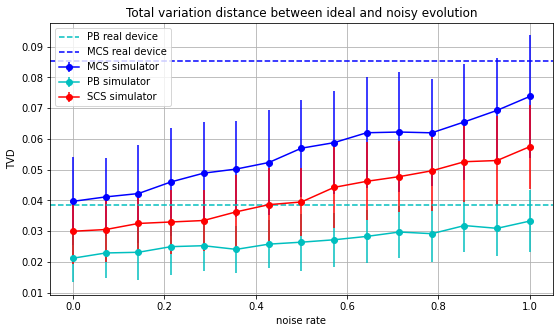

In [10]:
scales = np.linspace(0, 1, 15)
vd_seq = load_variation_distances("output/z_meas_seq_1000.txt")
v_distances = [[] for scale in scales]
for i in range(len(vd_seq)):
    for j in range(len(scales)):
        v_distances[j].append(vd_seq[i][j])

for i in range(len(v_distances)):
    v_distances[i] = np.array(v_distances[i])

vd_prob = load_variation_distances("output/z_meas_prob_1000.txt")
v_distances_prob = [[] for scale in scales]
for i in range(len(vd_prob)):
    for j in range(len(scales)):
        v_distances_prob[j].append(vd_prob[i][j])

for i in range(len(v_distances_prob)):
    v_distances_prob[i] = np.array(v_distances_prob[i])

vd_seq_sc = load_variation_distances("output/z_meas_single_c_1000.txt")

v_distances_seq_sc = [[] for scale in scales]
for i in range(len(vd_seq_sc)):
    for j in range(len(scales)):
        v_distances_seq_sc[j].append(vd_seq_sc[i][j])

for i in range(len(v_distances_seq_sc)):
    v_distances_seq_sc[i] = np.array(v_distances_seq_sc[i])


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.errorbar(scales, [v_i.mean() for v_i in v_distances], yerr=[v_i.std() for v_i in v_distances], fmt="-ob", label="MCS simulator")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_prob], yerr=[v_i.std() for v_i in v_distances_prob], fmt="-oc", label="PB simulator")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_seq_sc], yerr=[v_i.std() for v_i in v_distances_seq_sc], fmt="-or", label="SCS simulator")
plt.axhline(y=real_device_vd_prob, color='c', linestyle='--', label="PB real device")
plt.axhline(y=real_device_vd_seq, color='b', linestyle='--', label="MCS real device")

ax.legend()

plt.show()

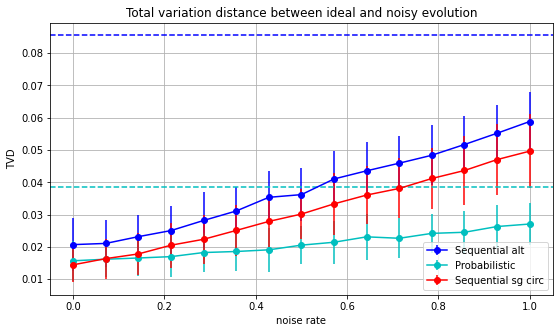

In [4]:
scales = np.linspace(0, 1, 15)
vd_seq = load_variation_distances("output/z_meas_seq_5000.txt")
v_distances = [[] for scale in scales]
for i in range(len(vd_seq)):
    for j in range(len(scales)):
        v_distances[j].append(vd_seq[i][j])

for i in range(len(v_distances)):
    v_distances[i] = np.array(v_distances[i])

vd_prob = load_variation_distances("output/z_meas_prob_5000.txt")
v_distances_prob = [[] for scale in scales]
for i in range(len(vd_prob)):
    for j in range(len(scales)):
        v_distances_prob[j].append(vd_prob[i][j])

for i in range(len(v_distances_prob)):
    v_distances_prob[i] = np.array(v_distances_prob[i])

vd_seq_sc = load_variation_distances("output/z_meas_single_c_5000.txt")

v_distances_seq_sc = [[] for scale in scales]
for i in range(len(vd_seq_sc)):
    for j in range(len(scales)):
        v_distances_seq_sc[j].append(vd_seq_sc[i][j])

for i in range(len(v_distances_seq_sc)):
    v_distances_seq_sc[i] = np.array(v_distances_seq_sc[i])


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.errorbar(scales, [v_i.mean() for v_i in v_distances], yerr=[v_i.std() for v_i in v_distances], fmt="-ob", label="Sequential alt")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_prob], yerr=[v_i.std() for v_i in v_distances_prob], fmt="-oc", label="Probabilistic")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_seq_sc], yerr=[v_i.std() for v_i in v_distances_seq_sc], fmt="-or", label="Sequential sg circ")
plt.axhline(y=real_device_vd_prob, color='c', linestyle='--')
plt.axhline(y=real_device_vd_seq, color='b', linestyle='--')

ax.legend()

plt.show()

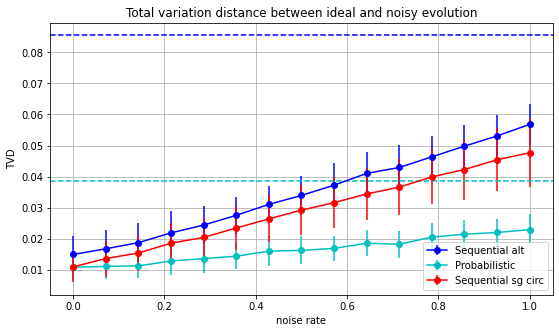

In [5]:
scales = np.linspace(0, 1, 15)
vd_seq = load_variation_distances("output/z_meas_seq_10000.txt")
v_distances = [[] for scale in scales]
for i in range(len(vd_seq)):
    for j in range(len(scales)):
        v_distances[j].append(vd_seq[i][j])

for i in range(len(v_distances)):
    v_distances[i] = np.array(v_distances[i])

vd_prob = load_variation_distances("output/z_meas_prob_10000.txt")
v_distances_prob = [[] for scale in scales]
for i in range(len(vd_prob)):
    for j in range(len(scales)):
        v_distances_prob[j].append(vd_prob[i][j])

for i in range(len(v_distances_prob)):
    v_distances_prob[i] = np.array(v_distances_prob[i])

vd_seq_sc = load_variation_distances("output/z_meas_single_c_10000.txt")

v_distances_seq_sc = [[] for scale in scales]
for i in range(len(vd_seq_sc)):
    for j in range(len(scales)):
        v_distances_seq_sc[j].append(vd_seq_sc[i][j])

for i in range(len(v_distances_seq_sc)):
    v_distances_seq_sc[i] = np.array(v_distances_seq_sc[i])


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.errorbar(scales, [v_i.mean() for v_i in v_distances], yerr=[v_i.std() for v_i in v_distances], fmt="-ob", label="Sequential alt")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_prob], yerr=[v_i.std() for v_i in v_distances_prob], fmt="-oc", label="Probabilistic")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_seq_sc], yerr=[v_i.std() for v_i in v_distances_seq_sc], fmt="-or", label="Sequential sg circ")
plt.axhline(y=real_device_vd_prob, color='c', linestyle='--')
plt.axhline(y=real_device_vd_seq, color='b', linestyle='--')

ax.legend()

plt.show()

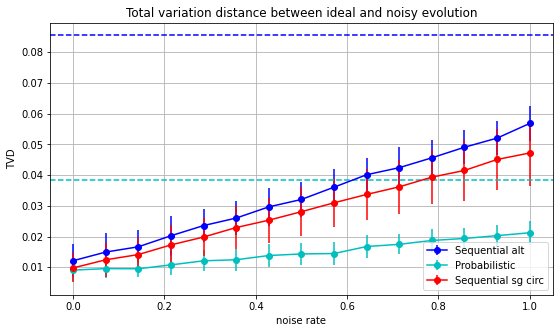

In [6]:
scales = np.linspace(0, 1, 15)
vd_seq = load_variation_distances("output/z_meas_seq_15000.txt")
v_distances = [[] for scale in scales]
for i in range(len(vd_seq)):
    for j in range(len(scales)):
        v_distances[j].append(vd_seq[i][j])

for i in range(len(v_distances)):
    v_distances[i] = np.array(v_distances[i])

vd_prob = load_variation_distances("output/z_meas_prob_15000.txt")
v_distances_prob = [[] for scale in scales]
for i in range(len(vd_prob)):
    for j in range(len(scales)):
        v_distances_prob[j].append(vd_prob[i][j])

for i in range(len(v_distances_prob)):
    v_distances_prob[i] = np.array(v_distances_prob[i])

vd_seq_sc = load_variation_distances("output/z_meas_single_c_15000.txt")

v_distances_seq_sc = [[] for scale in scales]
for i in range(len(vd_seq_sc)):
    for j in range(len(scales)):
        v_distances_seq_sc[j].append(vd_seq_sc[i][j])

for i in range(len(v_distances_seq_sc)):
    v_distances_seq_sc[i] = np.array(v_distances_seq_sc[i])


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.errorbar(scales, [v_i.mean() for v_i in v_distances], yerr=[v_i.std() for v_i in v_distances], fmt="-ob", label="Sequential alt")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_prob], yerr=[v_i.std() for v_i in v_distances_prob], fmt="-oc", label="Probabilistic")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_seq_sc], yerr=[v_i.std() for v_i in v_distances_seq_sc], fmt="-or", label="Sequential sg circ")
plt.axhline(y=real_device_vd_prob, color='c', linestyle='--')
plt.axhline(y=real_device_vd_seq, color='b', linestyle='--')

ax.legend()

plt.show()

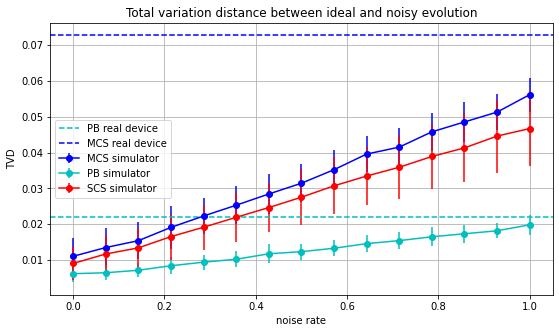

In [12]:
scales = np.linspace(0, 1, 15)
vd_seq = load_variation_distances("output/z_meas_seq_20000.txt")
v_distances = [[] for scale in scales]
for i in range(len(vd_seq)):
    for j in range(len(scales)):
        v_distances[j].append(vd_seq[i][j])

for i in range(len(v_distances)):
    v_distances[i] = np.array(v_distances[i])

vd_prob = load_variation_distances("output/z_meas_prob_20000.txt")
v_distances_prob = [[] for scale in scales]
for i in range(len(vd_prob)):
    for j in range(len(scales)):
        v_distances_prob[j].append(vd_prob[i][j])

for i in range(len(v_distances_prob)):
    v_distances_prob[i] = np.array(v_distances_prob[i])

vd_seq_sc = load_variation_distances("output/z_meas_single_c_20000.txt")

v_distances_seq_sc = [[] for scale in scales]
for i in range(len(vd_seq_sc)):
    for j in range(len(scales)):
        v_distances_seq_sc[j].append(vd_seq_sc[i][j])

for i in range(len(v_distances_seq_sc)):
    v_distances_seq_sc[i] = np.array(v_distances_seq_sc[i])


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.errorbar(scales, [v_i.mean() for v_i in v_distances], yerr=[v_i.std() for v_i in v_distances], fmt="-ob", label="MCS simulator")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_prob], yerr=[v_i.std() for v_i in v_distances_prob], fmt="-oc", label="PB simulator")
ax.errorbar(scales, [v_i.mean() for v_i in v_distances_seq_sc], yerr=[v_i.std() for v_i in v_distances_seq_sc], fmt="-or", label="SCS simulator")
plt.axhline(y=real_device_vd_prob_20, color='c', linestyle='--', label="PB real device")
plt.axhline(y=real_device_vd_seq_20, color='b', linestyle='--', label="MCS real device")

ax.legend()

plt.show()

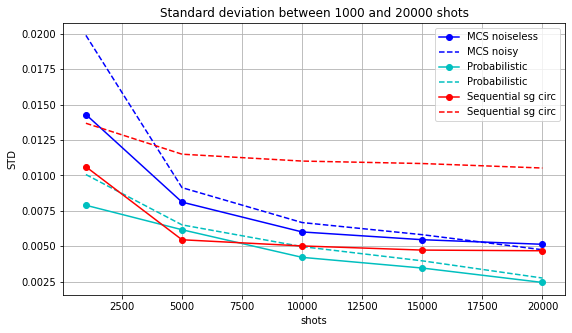

In [18]:
shots = [1000, 5000, 10000, 15000, 20000]

vd_seq_shots = []
for shot in shots:
    vd_seq_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_seq_{shot}.txt")
    for meas in loaded_file:
        vd_seq_shots_current.append(meas[0])
    vd_seq_shots.append(np.array(vd_seq_shots_current))

vd_seq_shots_noisy = []
for shot in shots:
    vd_seq_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_seq_{shot}.txt")
    for meas in loaded_file:
        vd_seq_shots_current.append(meas[14])
    vd_seq_shots_noisy.append(np.array(vd_seq_shots_current))

vd_prob_shots = []
for shot in shots:
    vd_prob_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_prob_{shot}.txt")
    for meas in loaded_file:
        vd_prob_shots_current.append(meas[0])
    vd_prob_shots.append(np.array(vd_prob_shots_current))

vd_prob_shots_noisy = []
for shot in shots:
    vd_prob_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_prob_{shot}.txt")
    for meas in loaded_file:
        vd_prob_shots_current.append(meas[14])
    vd_prob_shots_noisy.append(np.array(vd_prob_shots_current))

vd_single_c_shots = []
for shot in shots:
    vd_single_c_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_single_c_{shot}.txt")
    for meas in loaded_file:
        vd_single_c_shots_current.append(meas[0])
    vd_single_c_shots.append(np.array(vd_single_c_shots_current))

vd_single_c_shots_noisy = []
for shot in shots:
    vd_single_c_shots_current = []
    loaded_file = load_variation_distances(f"output/z_meas_single_c_{shot}.txt")
    for meas in loaded_file:
        vd_single_c_shots_current.append(meas[14])
    vd_single_c_shots_noisy.append(np.array(vd_single_c_shots_current))



## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Standard deviation between 1000 and 20000 shots")
ax.set_ylabel("STD")
ax.set_xlabel("shots")

ax.plot(shots, [v_i.std() for v_i in vd_seq_shots],"-ob", label="MCS noiseless")
ax.plot(shots, [v_i.std() for v_i in vd_seq_shots_noisy],"--b", label="MCS noisy")
ax.plot(shots, [v_i.std() for v_i in vd_prob_shots], "-oc", label="Probabilistic")
ax.plot(shots, [v_i.std() for v_i in vd_prob_shots_noisy], "--c", label="Probabilistic")
ax.plot(shots, [v_i.std() for v_i in vd_single_c_shots],"-or", label="Sequential sg circ")
ax.plot(shots, [v_i.std() for v_i in vd_single_c_shots_noisy],"--r", label="Sequential sg circ")

ax.legend()

plt.show()